# Exploring the Oncogenic Impact of *TP53* Variants on Breast Cancer: A Comprehensive Analysis

Importing the following datasets:
1. clinvar_conflicting.csv
2. Cancer_Diagnosis _TCGA_GBM_LGG_Mutations_all.csv
3. TP53_status
4. TumorVariantDownload_r20

Note: Given the complexity of this topic and the dispersed nature of the data, it is likely that various datasets will be utilized in this project. It is possible that not all of these datasets will be incorporated, and an exploration will be undertaken to determine the necessary data from each dataset to analyze the project's topic effectively.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset clinvar_conflicting from Kaggle
clinvar_df = pd.read_csv(r"C:\Users\Alison\Downloads\datasets\dataset1\clinvar_conflicting.csv", low_memory=False)

In [3]:
# Checking the first 5 rows
clinvar_df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [4]:
# Looking into the dataframe
clinvar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [73]:
# Checking the shape
clinvar_df.shape

(65188, 46)

In [79]:
# Identify duplicate rows in the DataFrame
cv_rdup = clinvar_df.duplicated().sum()
print(cv_rdup)

0


In [80]:
# Identify duplicate rows in the DataFrame
cv_cdup = clinvar_df.T.duplicated().sum()
print(cv_cdup)

0


The `clinvar` dataset is clean besides the null observations. For the purposes of this project, it'll be left in for now and during the later stages, if needed will be dealt with appropriately or dropped if not needed.

Now, let's examine the next dataset being used in the analysis.

In [81]:
# Importing the TP53_status file from Kaggle
tp53_df = pd.read_csv(r"C:\Users\Alison\Downloads\datasets\tp53\TP53_status.csv")
tp53_df = tp53_df.reset_index(drop = True)

In [82]:
# Checking the first 5 rows of the dataframe
tp53_df.head()

,GENE_NAME,SAMPLE_NAME,ID_SAMPLE,ID_TUMOUR,PRIMARY_SITE,SITE_SUBTYPE_1,SITE_SUBTYPE_2,PRIMARY_HISTOLOGY,HISTOLOGY_SUBTYPE_1,GENOMIC_MUTATION_ID,MUTATION_CDS,MUTATION_AA,MUTATION_GENOME_POSITION,FATHMM_PREDICTION,FATHMM_SCORE,MUTATION_SOMATIC_STATUS,TUMOUR_ORIGIN,AGE
0,TP53,D-542MG,753549,672519,central_nervous_system,brain,NS,glioma,NS,COSV52661877,c.733G>A,p.G245S,17:7674230-7674230,PATHOGENIC,0.99093,Confirmed somatic variant,primary,NaN
1,TP53,D-542MG,753549,672519,central_nervous_system,brain,NS,glioma,NS,COSV52661877,c.733G>A,p.G245S,17:7674230-7674230,PATHOGENIC,0.99093,Confirmed somatic variant,primary,NaN
2,TP53,D-542MG,753549,672519,central_nervous_system,brain,NS,glioma,NS,COSV52661877,c.733G>A,p.G245S,17:7674230-7674230,PATHOGENIC,0.99093,Confirmed somatic variant,primary,NaN
3,TP53,PD3991a,1280820,1192111,breast,NS,NS,carcinoma,NS,COSV52661877,c.733G>A,p.G245S,17:7674230-7674230,PATHOGENIC,0.99093,Confirmed somatic variant,primary,NaN
4,TP53,PD3991a,1280820,1192111,breast,NS,NS,carcinoma,NS,COSV52661877,c.733G>A,p.G245S,17:7674230-7674230,PATHOGENIC,0.99093,Confirmed somatic variant,primary,NaN


In [13]:
# Looking into the dataframe
tp53_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27428 entries, 0 to 27427
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENE_NAME                  27428 non-null  object 
 1    SAMPLE_NAME               27428 non-null  object 
 2    ID_SAMPLE                 27428 non-null  int64  
 3    ID_TUMOUR                 27428 non-null  int64  
 4    PRIMARY_SITE              27428 non-null  object 
 5    SITE_SUBTYPE_1            27428 non-null  object 
 6    SITE_SUBTYPE_2            27428 non-null  object 
 7    PRIMARY_HISTOLOGY         27428 non-null  object 
 8    HISTOLOGY_SUBTYPE_1       27428 non-null  object 
 9    GENOMIC_MUTATION_ID       22707 non-null  object 
 10   MUTATION_CDS              27428 non-null  object 
 11   MUTATION_AA               27428 non-null  object 
 12   MUTATION_GENOME_POSITION  22707 non-null  object 
 13   FATHMM_PREDICTION         19636 non-null  obj

There is a space in the names of some columns, it will be removed as follows:

In [83]:
# Removing the space in the names of the column
tp53_df = tp53_df.rename(columns={col: col.replace(' ', '') for col in tp53_df.columns})

In [85]:
# Saving a new dataframe to only include breast cancer tumors
tp53_bc_df = tp53_df[tp53_df["PRIMARY_SITE"] == "breast"]

In [86]:
#Looking at the dataframe
tp53_bc_df

,GENE_NAME,SAMPLE_NAME,ID_SAMPLE,ID_TUMOUR,PRIMARY_SITE,SITE_SUBTYPE_1,SITE_SUBTYPE_2,PRIMARY_HISTOLOGY,HISTOLOGY_SUBTYPE_1,GENOMIC_MUTATION_ID,MUTATION_CDS,MUTATION_AA,MUTATION_GENOME_POSITION,FATHMM_PREDICTION,FATHMM_SCORE,MUTATION_SOMATIC_STATUS,TUMOUR_ORIGIN,AGE
3,TP53,PD3991a,1280820,1192111,breast,NS,NS,carcinoma,NS,COSV52661877,c.733G>A,p.G245S,17:7674230-7674230,PATHOGENIC,0.99093,Confirmed somatic variant,primary,NaN
4,TP53,PD3991a,1280820,1192111,breast,NS,NS,carcinoma,NS,COSV52661877,c.733G>A,p.G245S,17:7674230-7674230,PATHOGENIC,0.99093,Confirmed somatic variant,primary,NaN
11,TP53,JT99-23,1358168,1268209,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52661877,c.733G>A,p.G245S,17:7674230-7674230,PATHOGENIC,0.99093,Reported in another cancer sample as somatic,primary,NaN
19,TP53,JA99-3,1362478,1272519,breast,NS,NS,carcinoma,NS,COSV52661877,c.733G>A,p.G245S,17:7674230-7674230,PATHOGENIC,0.99093,Reported in another cancer sample as somatic,primary,NaN
20,TP53,CUN00-957,1364607,1274648,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52661877,c.733G>A,p.G245S,17:7674230-7674230,PATHOGENIC,0.99093,Reported in another cancer sample as somatic,primary,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27411,TP53,CHE04-33,1399208,1309249,breast,NS,NS,carcinoma,NS,NaN,c.494_495insN,p.Q165fs*16,NaN,NaN,NaN,Variant of unknown origin,primary,NaN
27412,TP53,CON02-515,1386347,1296388,breast,NS,NS,carcinoma,NS,NaN,c.504_505insNN,p.M169fs*2,NaN,NaN,NaN,Variant of unknown origin,primary,NaN
27420,TP53,SD98-17,1382089,1292130,breast,NS,NS,carcinoma,ductal_carcinoma,NaN,c.750_751insNNN,p.P250_I251insX,NaN,NaN,NaN,Variant of unknown origin,primary,NaN
27423,TP53,CON02-359,1386336,1296377,breast,NS,NS,carcinoma,NS,NaN,c.645_646insNN,p.V216fs*32,NaN,NaN,NaN,Variant of unknown origin,primary,NaN


In [87]:
# Checking the shape
tp53_bc_df.shape

(5951, 18)

In [89]:
# Identify duplicate rows in the DataFrame
tp53_bc_df.duplicated().sum()

215

In [ ]:
# Looking at those duplicated rows
tp53_bc_df_rdup = tp53_bc_df[tp53_bc_df.duplicated()]
tp53_bc_df_rdup

In [99]:
# Checking only for duplicated sample names
tp53_bc_df_sn_dup = tp53_bc_df_rdup[tp53_bc_df_rdup["SAMPLE_NAME"].duplicated()]
tp53_bc_df_sn_dup

,GENE_NAME,SAMPLE_NAME,ID_SAMPLE,ID_TUMOUR,PRIMARY_SITE,SITE_SUBTYPE_1,SITE_SUBTYPE_2,PRIMARY_HISTOLOGY,HISTOLOGY_SUBTYPE_1,GENOMIC_MUTATION_ID,MUTATION_CDS,MUTATION_AA,MUTATION_GENOME_POSITION,FATHMM_PREDICTION,FATHMM_SCORE,MUTATION_SOMATIC_STATUS,TUMOUR_ORIGIN,AGE
696,TP53,PD4005a,1284071,1195366,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52665560,c.637C>T,p.R213*,17:7674894-7674894,PATHOGENIC,0.95493,Confirmed somatic variant,primary,NaN
697,TP53,PD4005a,1284071,1195366,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52665560,c.637C>T,p.R213*,17:7674894-7674894,PATHOGENIC,0.95493,Confirmed somatic variant,primary,NaN
1266,TP53,HCC1143,749710,668681,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52661580,c.743G>A,p.R248Q,17:7674220-7674220,PATHOGENIC,0.98009,Confirmed somatic variant,primary,52.0
2059,TP53,HCC38,749717,668688,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52664805,c.818G>T,p.R273L,17:7673802-7673802,PATHOGENIC,0.99597,Confirmed somatic variant,NS,50.0
3075,TP53,HCC1395,749712,668683,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52661038,c.524G>A,p.R175H,17:7675088-7675088,PATHOGENIC,0.98946,Confirmed somatic variant,NS,43.0
3991,TP53,HCC1937,749714,668685,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52662281,c.916C>T,p.R306*,17:7673704-7673704,PATHOGENIC,0.94691,Confirmed somatic variant,primary,23.0
4470,TP53,PD4109a,1317053,1227957,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52661282,c.659A>G,p.Y220C,17:7674872-7674872,PATHOGENIC,0.99146,Confirmed somatic variant,primary,NaN
4471,TP53,PD4109a,1317053,1227957,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52661282,c.659A>G,p.Y220C,17:7674872-7674872,PATHOGENIC,0.99146,Confirmed somatic variant,primary,NaN
6539,TP53,HCC2157,749715,668686,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52662035,c.742C>T,p.R248W,17:7674221-7674221,PATHOGENIC,0.93987,Confirmed somatic variant,primary,48.0
6546,TP53,PD3890a,1184078,1096043,breast,NS,NS,carcinoma,ductal_carcinoma,COSV52662035,c.742C>T,p.R248W,17:7674221-7674221,PATHOGENIC,0.93987,Confirmed somatic variant,primary,NaN


From the above, it can be seen that only three rows 697, 4471 and 11653  have the same `SAMPLE_NAME` and `SAMPLE_ID` with their predecessor rows. Those will be dropped.

In [100]:
# Dropping duplicated sample names
rows_to_drop = [697, 4471, 11653]
tp53_bc_df = tp53_bc_df.drop(rows_to_drop)

In [107]:
# Identify duplicate columns in the DataFrame
tp53_bc_df.T.duplicated()

GENE_NAME                   False
SAMPLE_NAME                 False
ID_SAMPLE                   False
ID_TUMOUR                   False
PRIMARY_SITE                False
SITE_SUBTYPE_1              False
SITE_SUBTYPE_2               True
PRIMARY_HISTOLOGY           False
HISTOLOGY_SUBTYPE_1         False
GENOMIC_MUTATION_ID         False
MUTATION_CDS                False
MUTATION_AA                 False
MUTATION_GENOME_POSITION    False
FATHMM_PREDICTION           False
FATHMM_SCORE                False
MUTATION_SOMATIC_STATUS     False
TUMOUR_ORIGIN               False
AGE                         False
dtype: bool

It is apparent that these datasets pertain to healthcare, and possible for multiple patients to test positive for the same mutation. Consequently, it is clear that the other columns would match in such cases. Therefore, the criterion for dropping rows was strictly based on unique samples.

Let's take a look at the next dataset.

In [57]:
# Importing this dataset from TP53 Website
umd_variants = pd.read_csv(r"C:\Users\Alison\Downloads\datasets\UMD_variants_US.csv", encoding='latin1')

In [58]:
umd_variants.head()

,cDNA_variant,UMD_ID,COSMIC_ID,SNP_ID,HG19_Variant,HG18_Variant,HG38_Variant,NG_017013.2_Variant,Transcript t1 MN_000546.5,Transcript t2 NM_001126112.2,Transcript t3 NM_001126114.2,Transcript t4 NM_001126113.2,Transcript t5 NM_001126115.1,Transcript t6 NM_001126116.1,Transcript t7 NM_001126117.1,Transcript t8 NM_001126118.1,Transcript t1 LRG_321,Transcript t2 LRG_321,Transcript t3 LRG_321,Transcript t4 LRG_321,Transcript t5 LRG_321,Transcript t6 LRG_321,Transcript t7 LRG_321,Transcript t8 LRG_321,Protein P1 TP53_alpha NP_000537.3,Protein P3 TP53_beta NP_001119586.1,Protein P4 TP53_gamma NP_001119585.1,Protein P8 Delta40_TP53_alpha NP_001119590.1,Protein P9 Delta 40_TP53_beta NP_001263625.1,Protein P10 Delta 40_TP53_gamma NP_001263624.1,Protein P5 Delta 133_TP53_alpha NP_001119587.1,Protein P6 Delta 133_TP53_beta NP_001119588.1,Protein P7 Delta 133_TP53_gamma NP_001119589.1,Protein P11 Delta160_TP53_alpha NP_001263626.1,Protein P12 Delta160_TP53_beta NP_001263627.1,Protein P13 Delta160_TP53_gamma NP_001263628.1,Protein P1 TP53_alpha,Protein P3 TP53_beta,Protein P4 TP53_gamma,Protein P8 Delta40_TP53_alpha,Protein P9 Delta 40_TP53_beta,Protein P10 Delta 40_TP53_gamma,Protein P5 Delta 133_TP53_alpha,Protein P6 Delta 133_TP53_beta,Protein P7 Delta 133_TP53_gamma,Protein P11 Delta160_TP53_alpha,Protein P12 Delta160_TP53_beta,Protein P13 Delta160_TP53_gamma,HG19_Start,HG19_End,HG18_Start,HG18_End,Exon:intron_Start,Exon:intron_End,Start_cDNA,End_cDNA,Genome_base_coding,Mutant_Allele,Base_Change_Size,Ins_Size,Del_Size,Codon,WT_Codon,Mutant_Codon,WT AA_1,WT AA_3,Mutant AA_1,Mutant AA_3,Substitution type,CpG,Mutational_event,Tandem_Class,Variant_Classification,Variant_Type,Mutation_Type,Variant_Comment,Domain,Structure,PTM,Records_Number,Leukemia_Lymhoma_Freq,Solid_Tumor_Freq,Tumor_Freq,Cell_line_Freq,Somatic_Freq 2,Germline_Freq 2,WAF1_Act,MDM2_Act,BAX_Act,_14_3_3_s_Act,AIP_Act,GADD45_Act,NOXA_Act,p53R2_Act,WAF1_percent,MDM2_percent,BAX_percent,14_3_3_s_percent,AIP_percent,GADD45_percent,NOXA_percent,p53R2_percent,Sift_Prediction,Sift_Score,Polyphen-2_HumVar,Polyphen-2_HumDiv,Mutassessor_prediction,Mutassessor_score,Provean_prediction,Provean_Score,Condel,Condel_Score,MutPred_Splice_General_Score,MutPred_Splice_Prediction_Label,MutPred_Splice_Confident_Hypotheses,Comment_1_Frequency,Comment_2_Activity,Comment_3_Isoforms,Comment_4 prediction,Comment_5_Outliers,Comment_6_Splicing,Comment_7_Sequence,Comment_10_population,Pathogenicity,Final comment
0,c.524G>A,UMD_3113,COSM10648,rs28934578,chr17:g.7578406G>A,chr17:g.7519131G>A,chr17:g.7675088G>A,NG_017013.2:g.17463G>A,c.524G>A,c.524G>A,c.524G>A,c.524G>A,c.128G>A,c.128G>A,c.128G>A,c.407G>A,LRG_321t1:c.524G>A,LRG_321t2:c.524G>A,LRG_321t3:c.524G>A,LRG_321t4:c.524G>A,LRG_321t5:c.128G>A,LRG_321t6:c.128G>A,LRG_321t7:c.128G>A,LRG_321t8:c.407G>A,p.R175H,p.R175H,p.R175H,p.R136H,p.R136H,p.R136H,p.R43H,p.R43H,p.R43H,p.R16H,p.R16H,p.R16H,LRG_321p1:p.R175H,LRG_321p3:p.R175H,LRG_321p4:p.R175H,LRG_321p8:p.R136H,LRG_321p9:p.R136H,LRG_321p10:p.R136H,LRG_321p5:p.R43H,LRG_321p6:p.R43H,LRG_321p7:p.R43H,LRG_321p11:p.R16H,LRG_321p12:p.R16H,LRG_321p13:p.R16H,7578406,7578406,7519131,7519131,5,5,524,524,G,A,1,0,0,175,CGC,CAC,R,Arg,H,His,Ts,Yes,G>A,NaN,Missense_Mutation,SNP,B,Exonic mutation,HCD III - DNA binding,Loop L2,NaN,3428,2.918,4.406,4.328,3.778,4.260,4.470,-1.134,-0.905,-1.099,-1.258,-1.513,-1.571,-1.556,-1.553,12.414,17.560,10.520,10.518,2.629,4.080,7.293,7.825,Damaging,0.000,Possibly damaging,Benign,Medium,3.345,Deleterious,-4.872,Deleterious,1,0.139,Splice Neutral Variant (SNV),Not relevant,This single nucleotide variant is very frequent,Inactive,This substitution targets 12 TP53 isoforms,Damaging,-,No splice defect predicted,-,rs28934578; listed in the ExAc database (witho...,Pathogenic,Published research as well as database analysi...
1,c.743G>A,UMD_4903,COSM10662,rs11540652,chr17:g.7577538G>A,chr17:g.7518263G>A,chr17:g.7674220G>A,NG_017013.2:g.18331G>A,c.743G>A,c.743G>A,c.743G>A,c.743G>A,c.347G>A,c.34

In [71]:
umd_variants_cols = umd_variants.columns
print(umd_variants_cols)

Index(['cDNA_variant', 'UMD_ID', 'COSMIC_ID', 'SNP_ID', 'HG19_Variant', 'HG18_Variant', 'HG38_Variant', 'NG_017013.2_Variant', 'Transcript t1 MN_000546.5', 'Transcript t2 NM_001126112.2',
       ...
       'Comment_1_Frequency', 'Comment_2_Activity', 'Comment_3_Isoforms', 'Comment_4 prediction', 'Comment_5_Outliers', 'Comment_6_Splicing', 'Comment_7_Sequence', 'Comment_10_population', 'Pathogenicity', 'Final comment'], dtype='object', length=125)


Since, there are a total of 125 columns, it is not displaying all the data.

In [59]:
umd_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6870 entries, 0 to 6869
Columns: 125 entries, cDNA_variant to Final comment
dtypes: float64(6), int64(1), object(118)
memory usage: 6.6+ MB


In [60]:
umd_variants.describe()

,Records_Number,Leukemia_Lymhoma_Freq,Solid_Tumor_Freq,Tumor_Freq,Cell_line_Freq,Somatic_Freq 2,Germline_Freq 2
count,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000
mean,11.703348,0.014632,0.014366,0.014395,0.014572,0.014498,0.014555
std,84.229317,0.103850,0.105970,0.105370,0.117624,0.104714,0.135407
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.001000,0.001000,0.000000,0.001000,0.000000
50%,1.000000,0.000000,0.001000,0.001000,0.000000,0.001000,0.000000
75%,4.000000,0.000000,0.006000,0.005000,0.000000,0.005000,0.000000
max,3428.000000,4.674000,4.406000,4.328000,4.995000,4.260000,4.636000


In [64]:
# Calculate the sum of missing values for each column
missing_values_sum = umd_variants.isna().sum()

# Create a new DataFrame to display the missing values information
missing_values_df = pd.DataFrame(missing_values_sum, columns=['Missing_Values_Count'])

# Filter the DataFrame to show only columns with missing values
columns_with_missing_values = missing_values_df[missing_values_df['Missing_Values_Count'] > 0]

# Display the filtered DataFrame
print(columns_with_missing_values)

                       Missing_Values_Count
COSMIC_ID                              5157
SNP_ID                                 6505
Mutant_Allele                          3230
Tandem_Class                           6520
Domain                                  713
Structure                              3460
PTM                                    6063
Comment_5_Outliers                     3917
Comment_10_population                   185
Pathogenicity                             5
Final comment                             5


Reminder: The total number of rows = 6870

In [110]:
umd_variants.duplicated().sum()

0

In [111]:
umd_variants.T.duplicated().sum()

0

Let's import the last dataset

In [108]:
# Importing this dataset from TP53 Database
tp53_func = pd.read_csv(r"C:\Users\Alison\Downloads\datasets\TP53Database\FunctionDownload_r20.csv")

In [66]:
tp53_func.head()

,Function_ID,ProtDescription,AAchange,Codon_Number,WT_AA,Mutant_AA,SwissProtLink,Structural_motif,Codon72AA,Conserved_WT_Function,Loss_of_Function,Dominant_Negative_Activity,Gain_of_Function,Temperature_Sensitivity,Temp_ref,Cell_assay,Cell_lines,Assay_design,Method,FRef_ID,Authors,Title,Year,Journal,Volume,Start_page,PubMed
0,1,p.V143A,V143A,143,Val,Ala,5887.0,NDBL/beta-sheets,R,DNAb (p53CON),TA (p53CON) partial; TA (RGC),NaN,NaN,NaN,37°C,Human,K-562,WT control,"Luciferase assay, EMSA",1,Zhang W;Funk WD;Wright WE;Shay JW;Deisseroth AB;,Novel DNA binding of p53 mutants and their rol...,1993,Oncogene,8.0,2555.0,8361764
1,2,p.R175H,R175H,175,Arg,His,5932.0,L2/L3,NaN,DNAb (p53CON),"TA (p53CON, RGC)",NaN,NaN,NaN,37°C,Human,K-562,WT control,"Luciferase assay, EMSA",1,Zhang W;Funk WD;Wright WE;Shay JW;Deisseroth AB;,Novel DNA binding of p53 mutants and their rol...,1993,Oncogene,8.0,2555.0,8361764
2,6,p.R248W,R248W,248,Arg,Trp,5984.0,L2/L3,NaN,NaN,"DNAb (p53CON); TA (p53CON, RGC)",NaN,NaN,NaN,37°C,Human,K-562,WT control,"Luciferase assay, EMSA",1,Zhang W;Funk WD;Wright WE;Shay JW;Deisseroth AB;,Novel DNA binding of p53 mutants and their rol...,1993,Oncogene,8.0,2555.0,8361764
3,7,p.R273H,R273H,273,Arg,His,5995.0,L1/S/H2,NaN,DNAb (p53CON),TA (p53CON) partial; TA (RGC),NaN,NaN,NaN,37°C,Human,K-562,WT control,"Luciferase assay, EMSA",1,Zhang W;Funk WD;Wright WE;Shay JW;Deisseroth AB;,Novel DNA binding of p53 mutants and their rol...,1993,Oncogene,8.0,2555.0,8361764
4,8,p.D281G,D281G,281,Asp,Gly,6012.0,L1/S/H2,NaN,NaN,"DNAb (p53CON); TA (p53CON, RGC)",NaN,NaN,NaN,37°C,Human,K-562,WT control,"Luciferase assay, EMSA",1,Zhang W;Funk WD;Wright WE;Shay JW;Deisseroth AB;,Novel DNA binding of p53 mutants and their rol...,1993,Oncogene,8.0,2555.0,8361764


In [67]:
tp53_func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Function_ID                 7570 non-null   int64  
 1   ProtDescription             7570 non-null   object 
 2   AAchange                    7570 non-null   object 
 3   Codon_Number                7570 non-null   int64  
 4   WT_AA                       7570 non-null   object 
 5   Mutant_AA                   6640 non-null   object 
 6   SwissProtLink               3939 non-null   float64
 7   Structural_motif            7570 non-null   object 
 8   Codon72AA                   879 non-null    object 
 9   Conserved_WT_Function       3223 non-null   object 
 10  Loss_of_Function            4412 non-null   object 
 11  Dominant_Negative_Activity  652 non-null    object 
 12  Gain_of_Function            709 non-null    object 
 13  Temperature_Sensitivity     789 n

In [113]:
tp53_func.duplicated().sum()

0

In [115]:
tp53_func.T.duplicated().sum()

0

Description

1. Function_ID:Unique identification number for each entry.
2. ProtDescription: Structural_motif
3. AAchange: Amino acid change
4. Codon_Number: For variants in exons, codon number at which the variant is located (1-393). If a variant spans more than one codon, (e.g. tandem variant or deletion of several bases) only the first (5') codon is entered. For variants in introns, 0 is entered.
5. Mutant_AA:Mutant amino acid
6. SwissProtLink: SwissProt identification number with link to the variant page of the SwissProt database.
7. Structural_motif: Related to the protein
8. Codon72AA: Amino-acid at codon 72 of p53 (polymorphism)
9. Conserved_WT_Function: Functional property of mutant that is similar to the activity of the wild-type protein.
10. Loss_of_Function: WTp53 functional property that is lost by the mutant protein.
Same annotations as in previous column, with partial" indicating that the loss of function is partial (residual activity).
11. Dominant_Negative_Activity: Inhibition of the wild-type protein by mutant proteins in transactivation or cell growth assays.
- Yes = the mutant protein counteract the activity of the wild-type protein when the two proteins are co-expressed in human or yeast cells (the p53-response element or cell growth assay performed is indicated in brakets);
- No = the mutant protein does not counteract the effects of the wild-type protein.
- "moderate" indicates that the mutant protein has a partial inhibiting effect on the wild-type protein.
12. Gain_of_Function: Functional properties displayed by the mutant but not by the wild-type protein.
13. Temperature_Sensitivity: Sensitivity of mutant to temperature changes in transactivation assays
14. Temp_ref: Temperature at which experiments have been performed or which has been used as reference for temperature sensitivity assays.
15. Cell_assay: Human = the activity of the mutant protein has been tested in human cells.
Yeast = the activity of the mutant protein has been tested in the yeast.
16. Cell_lines: Name of cell-line(s) that have been used for testing mutant activities. "(endo)" indicates that activities have been tested on endogenous mutants.
17. Assay_design: Details on type of experimental assay that was performed to assess function.
18. Method: Unavailable
19. FRef_ID: Unavailable
20. Authors: Unavailable
21. Title: Unavailable
22. Year: Unavailable
23. Journal: Unavailable
24. Volume: Unavailable
25. Start_page: Unavailable
26. PubMed: Unavailable

Let's begin with the last dataset, `tp53_func`, dropping the columns that are uninformative. Columns 13 onwards is beyond the scope of this project.

In [116]:
# Keeping columns 0 to 12
tp53_func = tp53_func.iloc[:, :13]

In [117]:
tp53_func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Function_ID                 7570 non-null   int64  
 1   ProtDescription             7570 non-null   object 
 2   AAchange                    7570 non-null   object 
 3   Codon_Number                7570 non-null   int64  
 4   WT_AA                       7570 non-null   object 
 5   Mutant_AA                   6640 non-null   object 
 6   SwissProtLink               3939 non-null   float64
 7   Structural_motif            7570 non-null   object 
 8   Codon72AA                   879 non-null    object 
 9   Conserved_WT_Function       3223 non-null   object 
 10  Loss_of_Function            4412 non-null   object 
 11  Dominant_Negative_Activity  652 non-null    object 
 12  Gain_of_Function            709 non-null    object 
dtypes: float64(1), int64(2), object(1

Since the `Dominant_Negative_Activity` column has strings not needed, the following is beind executed to remove the text.

In [134]:
import re

# Define a function to split the 'Dominant_Negative_Activity' column
def split_dna_activity(row):
    if pd.isnull(row) or row == '':
        return pd.Series(['NA', ''])
    match = re.match(r'(yes|no|NA|moderate)(.*)', row, re.IGNORECASE)
    if match:
        return pd.Series([match.group(1).capitalize(), match.group(2).strip()])
    else:
        return pd.Series(['NA', ''])

# Apply the function to the dataframe
tp53_func[['Dominant_Negative_Activity', 'Dominant_Negative_Activity_Reason']] = tp53_func['Dominant_Negative_Activity'].apply(lambda x: split_dna_activity(x))

# Display the head of the dataframe to verify the changes
tp53_func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Function_ID                        7570 non-null   int64  
 1   ProtDescription                    7570 non-null   object 
 2   AAchange                           7570 non-null   object 
 3   Codon_Number                       7570 non-null   int64  
 4   WT_AA                              7570 non-null   object 
 5   Mutant_AA                          6640 non-null   object 
 6   SwissProtLink                      3939 non-null   float64
 7   Structural_motif                   7570 non-null   object 
 8   Codon72AA                          879 non-null    object 
 9   Conserved_WT_Function              3223 non-null   object 
 10  Loss_of_Function                   4412 non-null   object 
 11  Dominant_Negative_Activity         7570 non-null   objec

In [141]:
# Importing a dataset for nucleic acid mutations from TP53Database
mut_view_df = pd.read_csv(r"C:\Users\Alison\Downloads\datasets\TP53Database\MutationView_r20.csv", low_memory=False)

In [144]:
mut_view_df.head()

,MUT_ID,hg18_Chr17_coordinates,hg19_Chr17_coordinates,hg38_Chr17_coordinates,ExonIntron,Codon_number,Description,c_description,g_description,g_description_GRCh38,ProtDescription,hgvs_hg19,hgvs_hg38,hgvs_NM_000546,Splice_site,CpG_site,Context_coding_3,Type,WT_nucleotide,Mutant_nucleotide,Mut_rate,WT_codon,Mutant_codon,WT_AA,Mutant_AA,Mut_rateAA,Effect,Polymorphism,COSMIClink,CLINVARlink,TCGA_ICGC_GENIE_count,Hotspot,SNPlink,gnomADlink,SourceDatabases,PubMedlink,Residue_function,Domain_function,Structural_motif,SA,TransactivationClass,DNE_LOFclass,DNEclass,StructureFunctionClass,AGVGDClass,SIFTClass,Polyphen2,BayesDel,REVEL,EffectGroup3,SwissProtLink,WAF1nWT,MDM2nWT,BAXnWT,h1433snWT,AIP1nWT,GADD45nWT,NOXAnWT,P53R2nWT,AAchange,WAF1nWT_Saos2,MDM2nWT_Saos2,BAXnWT_Saos2,h1433snWT_Saos2,AIP1nWT_Saos2,PUMAnWT_Saos2,SubG1nWT_Saos2,Type_ID,AAchange_ID,MutationView_ID,Somatic_count,Germline_count,CellLine_count,SpliceAI_DS_AG,SpliceAI_DS_AL,SpliceAI_DS_DG,SpliceAI_DS_DL,SpliceAI_DP_AG,SpliceAI_DP_AL,SpliceAI_DP_DG,SpliceAI_DP_DL
0,5768,0,0,0,NaN,0,rearrangement/large del,c.?(del),g.?(del),g.?(del),p.?,NC_000017.10:g.?(del),NC_000017.11:g.?(del),NM_000546.5:c.?(del),no,no,na,complex,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,large del,NaN,NaN,NaN,0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1641,21508,42,6,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6446,7520637,7579912,7676594,2-exon,1,del1182,c.1_1182del,g.7572927_7579912del,g.7669609_7676594del,p.?,NC_000017.10:g.7572927_7579912del,NC_000017.11:g.7669609_7676594del,NM_000546.5:c.1_1182del,no,no,na,del,A,NaN,NaN,ATG,NaN,Met,NaN,NaN,large del,no,18654.0,NaN,0,no,NaN,NaN,NaN,NaN,NaN,Transactivation TAD1,N-term/Transactivation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1641,6088,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5535,0,0,0,NaN,0,del45kb,c.?(del45kb),g.?(del45kb),g.?(del45kb),p.?,NC_000017.10:g.?(del45kb),NC_000017.11:g.?(del45kb),NM_000546.5:c.?(del45kb),no,no,na,complex,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,large del,NaN,NaN,NaN,0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1641,21507,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29952,7514758,7574033,7670715,10-exon,332,del1064,c.994_1139del,g.7572970_7574033,g.7669652_7670715del,p.?,NC_000017.10:g.7572970_7574033,NC_000017.11:g.7669652_7670715del,NM_000546.5:c.994_1139del,no,no,G_T,del,A,NaN,NaN,ATC,NaN,Ile,NaN,NaN,large del,no,NaN,NaN,0,yes,NaN,NaN,NaN,NaN,Tetramerisation,Tetramerisation,C-term/tetramerisation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1641,1165,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29937,23,23,23,e1-exon,0,del exon1,c.?(del exon1),g.?,g.?,p.?,NC_000017.10:g.?,NC_000017.11:g.?,NM_000546.5:c.?(del exon1),no,no,na,del,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,large del,NaN,NaN,NaN,0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1641,3191,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
mut_view_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24253 entries, 0 to 24252
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MUT_ID                  24253 non-null  int64  
 1   hg18_Chr17_coordinates  24253 non-null  int64  
 2   hg19_Chr17_coordinates  24253 non-null  int64  
 3   hg38_Chr17_coordinates  24253 non-null  int64  
 4   ExonIntron              24250 non-null  object 
 5   Codon_number            24253 non-null  int64  
 6   Description             24253 non-null  object 
 7   c_description           24253 non-null  object 
 8   g_description           24253 non-null  object 
 9   g_description_GRCh38    24253 non-null  object 
 10  ProtDescription         24253 non-null  object 
 11  hgvs_hg19               24253 non-null  object 
 12  hgvs_hg38               24253 non-null  object 
 13  hgvs_NM_000546          24253 non-null  object 
 14  Splice_site             24253 non-null

In [153]:
# Remove spaces from 'WT_nucleotide' and 'Mutant_nucleotide' columns
mut_view_df['WT_nucleotide'] = mut_view_df['WT_nucleotide'].str.replace(' ', '').replace('na', 'NA')
mut_view_df['Mutant_nucleotide'] = mut_view_df['Mutant_nucleotide'].str.replace(' ', '').replace('nA', 'NA')

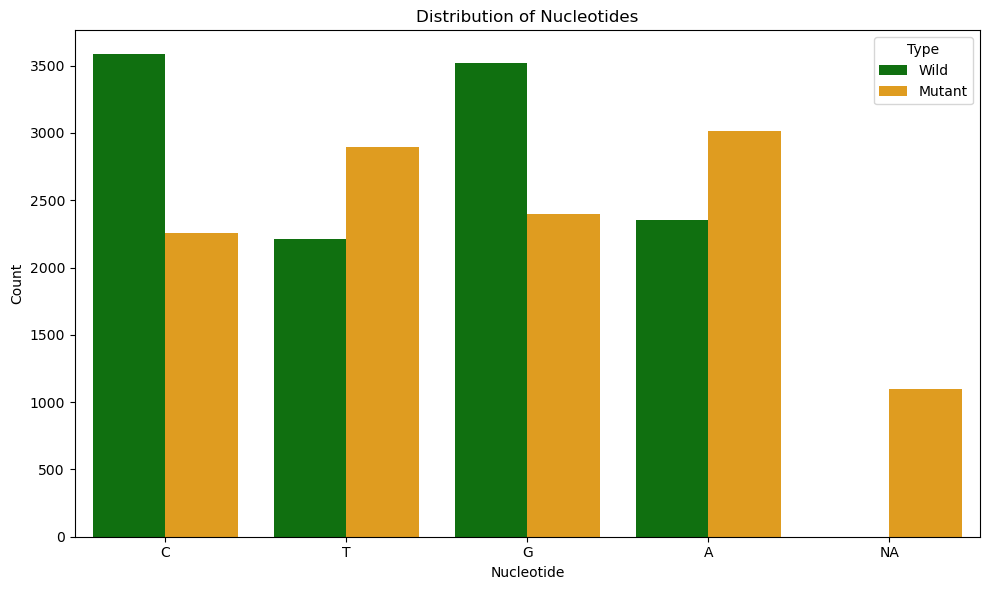

In [180]:
# Drop rows with NaN values in 'WT_nucleotide' and 'Mutant_nucleotide'
mut_view_df_filtered = mut_view_df.dropna(subset=['WT_nucleotide', 'Mutant_nucleotide'])

# Stack 'WT_nucleotide' and 'Mutant_nucleotide' along with a corresponding 'Type' column
stacked_df_wild = pd.DataFrame({'Nucleotide': mut_view_df_filtered['WT_nucleotide'].values,
                                'Type': 'Wild'})
stacked_df_mutant = pd.DataFrame({'Nucleotide': mut_view_df_filtered['Mutant_nucleotide'].values,
                                  'Type': 'Mutant'})
stacked_df = pd.concat([stacked_df_wild, stacked_df_mutant])

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot the combined data
sns.countplot(x='Nucleotide', hue='Type', data=stacked_df, palette={'Wild': 'green', 'Mutant': 'orange'})
plt.title('Distribution of Nucleotides')
plt.xlabel('Nucleotide')
plt.ylabel('Count')

# Export the image
plt.savefig(r'C:\Users\Alison\Downloads\datasets\nucleotide_comparison.png', dpi=300)

plt.tight_layout()
plt.show()


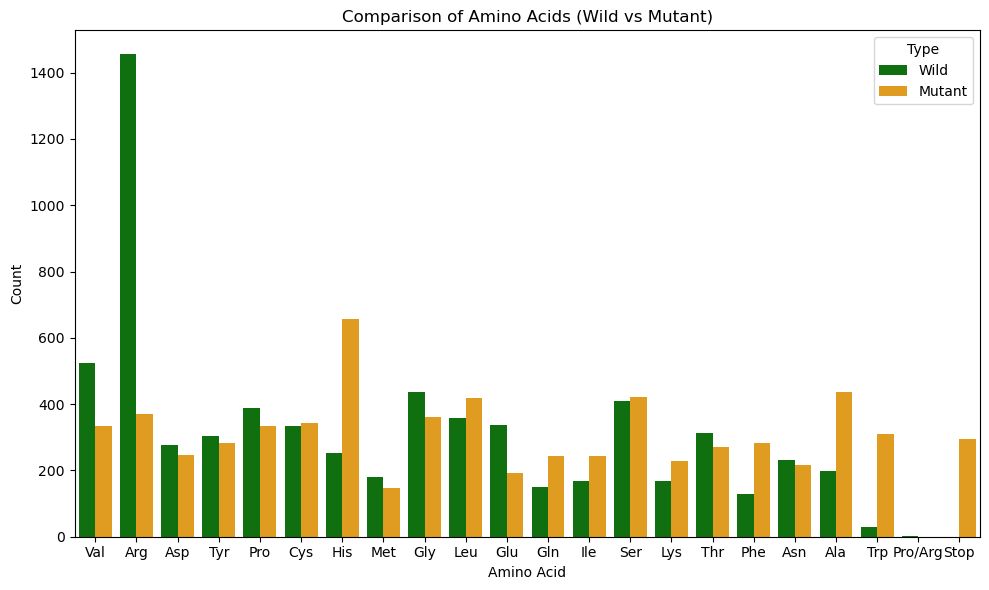

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming tp53_func is your DataFrame

# Drop rows with NaN values in 'WT_AA' and 'Mutant_AA'
tp53_func_filtered = tp53_func.dropna(subset=['WT_AA', 'Mutant_AA'])

# Create a new DataFrame with 'WT_AA', 'Mutant_AA', and 'Type' columns
comparison_df = pd.DataFrame({
    'Amino Acid': pd.concat([tp53_func_filtered['WT_AA'], tp53_func_filtered['Mutant_AA']]),
    'Type': ['Wild'] * len(tp53_func_filtered) + ['Mutant'] * len(tp53_func_filtered)
})

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot a bar plot to compare 'WT_AA' and 'Mutant_AA'
sns.countplot(x='Amino Acid', hue='Type', data=comparison_df, palette={'Wild': 'green', 'Mutant': 'orange'})
plt.title('Comparison of Amino Acids (Wild vs Mutant)')
plt.xlabel('Amino Acid')
plt.ylabel('Count')

# Export the image
plt.savefig(r'C:\Users\Alison\Downloads\datasets\amino_acid_comparison.png', dpi=300)

plt.tight_layout()
plt.show()
